In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import folium
%matplotlib inline

database = 'database.sqlite'
conn = sqlite3.connect(database)

In [9]:
goals_per_league = pd.read_sql("""SELECT League.name AS league_name,
                                        Country.name AS Country,
                                        SUM(home_team_goal+away_team_goal) AS total_goals,
                                        COUNT(Match.match_api_id) AS total_matches,
                                        (CAST (SUM(home_team_goal+away_team_goal) as float)/COUNT(Match.match_api_id)) AS goals_per_game
                                FROM League
                                JOIN Match on League.id = Match.league_id
                                JOIN Country on League.country_id = Country.id 
                                GROUP BY League.name
                                ORDER BY total_goals ASC
                                ;""", conn)
goals_per_league

,league_name,Country,total_goals,total_matches,goals_per_game
0,Switzerland Super League,Switzerland,4166,1422,2.929677
1,Poland Ekstraklasa,Poland,4656,1920,2.425000
2,Scotland Premier League,Scotland,4804,1824,2.633772
3,Belgium Jupiler League,Belgium,4841,1728,2.801505
4,Portugal Liga ZON Sagres,Portugal,5201,2052,2.534600
5,Germany 1. Bundesliga,Germany,7103,2448,2.901552
6,France Ligue 1,France,7427,3040,2.443092
7,Netherlands Eredivisie,Netherlands,7542,2448,3.080882
8,Italy Serie A,Italy,7895,3017,2.616838
9,England Premier League,England,8240,3040,2.710526


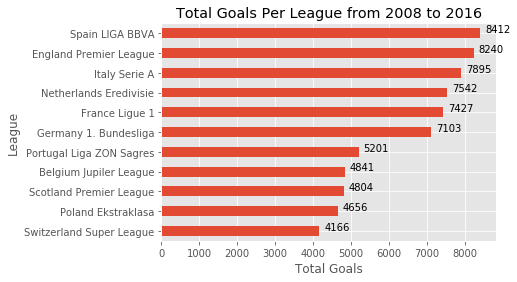

In [90]:
plt.style.use('ggplot')

ax = goals_per_league.plot(x='league_name', y='total_goals', kind='barh', legend=False) 
plt.xlabel("Total Goals")
plt.ylabel("League")
plt.title("Total Goals Per League from 2008 to 2016")

for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() - .2), xytext=(5, 10), textcoords='offset points')

plt.show()

In [80]:
country_geo = 'euro-countries.json'

m = folium.Map(location=[49, 10], zoom_start=4)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=goals_per_league,
    columns=['Country', 'total_goals'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Goals'
).add_to(m)

folium.LayerControl().add_to(m)

m

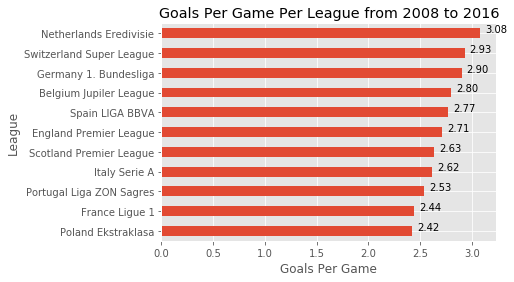

In [54]:
plt.style.use('ggplot')

gpg = goals_per_league.sort_values('goals_per_game')
ax = gpg.plot(x='league_name', y='goals_per_game', kind='barh', legend=False) 
plt.xlabel("Goals Per Game")
plt.ylabel("League")
plt.title("Goals Per Game Per League from 2008 to 2016")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() - .2), xytext=(5, 10), textcoords='offset points')

plt.show()

In [84]:
m = folium.Map(location=[49, 10], zoom_start=4)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=goals_per_league,
    columns=['Country', 'goals_per_game'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Goals Per Game'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [1]:
#results_1516 = pd.read_sql("""SELECT Match.id, 
 #                                       Country.name AS country_name, 
  #                                      League.name AS league_name, 
   #                                     season, 
    #                                    stage, 
     #                                   date,
      #                                  HT.team_long_name AS  home_team,
       #                                 AT.team_long_name AS away_team,
        #                                home_team_goal, 
         #                               away_team_goal,
          #                              Match.home_team_api_id
           #                     FROM Match
            #                    JOIN Country on Country.id = Match.country_id
             #                   JOIN League on League.id = Match.league_id
              #                  LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
               #                 LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                #                WHERE ((home_team = 'Real Madrid CF' OR away_team = 'Real Madrid CF') AND season = '2015/2016')
                 #               ORDER by date
                  #              ;""", conn)
#results_1516.head()

In [2]:
#madrid_players = pd.read_sql("""SELECT DISTINCT P.player_name, PA.overall_rating                            
 #                              LEFT JOIN Player_Attributes AS PA on PA.player_api_id = P.player_api_id
  #                              LEFT JOIN Match AS HM on HM.home_player_1 = P.player_api_id OR HM.home_player_2 = P.player_api_id OR HM.home_player_3 = P.player_api_id OR HM.home_player_4 = P.player_api_id OR HM.home_player_5 = P.player_api_id OR HM.home_player_6 = P.player_api_id OR HM.home_player_7 = P.player_api_id OR HM.home_player_8 = P.player_api_id OR HM.home_player_9 = P.player_api_id OR HM.home_player_10 = P.player_api_id OR HM.home_player_11 = P.player_api_id
   #                             WHERE ((HM.home_team_api_id = '8633') AND (HM.season = '2015/2016'))
    #                            ;""", conn)
#madrid_players

In [3]:
#madrid_players = pd.read_sql("""SELECT DISTINCT player_name                              
#                                FROM Player
 #                               LEFT JOIN Match AS HM on HM.home_player_1 = player_api_id OR HM.home_player_2 = player_api_id OR HM.home_player_3 = player_api_id OR HM.home_player_4 = player_api_id OR HM.home_player_5 = player_api_id OR HM.home_player_6 = player_api_id OR HM.home_player_7 = player_api_id OR HM.home_player_8 = player_api_id OR HM.home_player_9 = player_api_id OR HM.home_player_10 = player_api_id OR HM.home_player_11 = player_api_id
  #                              LEFT JOIN Match AS AM on AM.away_player_1 = player_api_id OR AM.away_player_2 = player_api_id OR AM.away_player_3 = player_api_id OR AM.away_player_4 = player_api_id OR AM.away_player_5 = player_api_id OR AM.away_player_6 = player_api_id OR AM.away_player_7 = player_api_id OR AM.away_player_8 = player_api_id OR AM.away_player_9 = player_api_id OR AM.away_player_10 = player_api_id OR AM.away_player_11 = player_api_id
   #                             WHERE ((HM.home_team_api_id = '8633' OR AM.away_team_api_id = '8633') AND (HM.season = '2015/2016' OR AM.season = '2015/2016') )
    #                            ;""", conn)